# Setup

In [1]:
# Get VM CPU and R version
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}
shell_call("grep -m1 'model name' /proc/cpuinfo | awk -F': ' '{printf \" CPU Model: %s \\n \",  $2}'")
shell_call("grep 'cpu cores' /proc/cpuinfo  | awk -F': ' '{a[cores]+=$2}END{printf \"CPU Cores: %s \\n \", a[cores] }'")
shell_call("grep MemTotal /proc/meminfo | awk '{printf \"RAM: %.1fGB \\n \", $2 / 1024 / 1024}'")
shell_call("R --version | head -n 1")

 CPU Model: Intel(R) Xeon(R) CPU @ 2.20GHz 
 CPU Cores: 72 
 RAM: 83.5GB 
 R version 4.4.1 (2024-06-14) -- "Race for Your Life"

In [2]:
# Get GPU Info
shell_call("nvidia-smi")

Tue Aug 27 04:45:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [3]:
# Install Torch with valid CUDA version

options(timeout = 600) # increasing timeout is recommended since we will be downloading a 2GB file.
# For Windows and Linux: "cpu", "cu117", "cu118" are the only currently supported
# For MacOS the supported are: "cpu-intel" or "cpu-m1"
kind <- "cu118"
version <- available.packages()["torch","Version"]
options(repos = c(
  torch = sprintf("https://torch-cdn.mlverse.org/packages/%s/%s/", kind, version),
  CRAN = "https://cloud.r-project.org" # or any other from which you want to install the other R dependencies.
))

install.packages("torch")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coro’, ‘safetensors’




In [4]:
# Test Torch installation

library(torch)
torch_rand(4)

torch_tensor
 0.3533
 0.4855
 0.5023
 0.6889
[ CPUFloatType{4} ]

In [5]:
# Install BKTR

install.packages('BKTR')

### From Github (Latest Version)
# install.packages("devtools") # if not installed
# devtools::install_github("julien-hec/BKTR", ref = "main")

# For section 4 side by side plots
# install.packages('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘collections’, ‘png’, ‘plyr’, ‘jpeg’, ‘bitops’, ‘R6P’, ‘ggmap’




In [6]:
# The following block is because Jupyter for R does not print until the end of
# the code block execution. So, with this command we add real time printing.
# See: https://stackoverflow.com/questions/37689694/real-time-printing-to-console-with-r-in-jupyter
trace(what = "print", where = getNamespace("base"), exit = flush.console, print = FALSE)

Tracing function "print" in package "namespace:base"



[1] "print"

# Load Libraries

In [7]:
# Code to run BKTR examples #
# Lanthier, Lei, Sun and Labbe 2023 #

library('BKTR')
library(data.table)
library(ggplot2)
# library('ggpubr')

# Setup Stadia Token

In [8]:
## In the following input, enter the API token that was provided by STADIA
## WARNING: Be sure to not print this variable before sharing the notebook.

stadia_api_token <- getPass('Enter your Stadia API key: ')

Enter your Stadia API key: ··········


# Run BKTR

## Section 6.1

In [18]:

#################################
#################################
# Section 6: Experimental study #
#################################
#################################

#################################################
# WARNING: This section uses a large dataset.   #
#     It requires a GPU to run with cuda.       #
#     If also requires a fair amount of memory. #
#################################################

#####################
### 6.1: Analysis ###
#####################

library(BKTR)

TSR$set_params(seed = 0, fp_type = 'float32', fp_device = 'cuda')
bixi_data <- BixiData$new()

p_lgth <- KernelParameter$new(value = 7, is_fixed = TRUE)
k_local_periodic <- KernelSE$new() * KernelPeriodic$new(period_length = p_lgth)
bktr_regressor <- BKTRRegressor$new(
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  data_df = bixi_data$data_df,
  spatial_positions_df = bixi_data$spatial_positions_df,
  temporal_positions_df = bixi_data$temporal_positions_df,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = k_local_periodic,
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()

[1] "Iter 1     | Elapsed Time:     0.23s | MAE:  0.1017 | RMSE:  0.1382"
[1] "Iter 2     | Elapsed Time:     0.15s | MAE:  0.0638 | RMSE:  0.0867"
[1] "Iter 3     | Elapsed Time:     0.42s | MAE:  0.0589 | RMSE:  0.0805"
[1] "Iter 4     | Elapsed Time:     0.21s | MAE:  0.0577 | RMSE:  0.0787"
[1] "Iter 5     | Elapsed Time:     0.19s | MAE:  0.0573 | RMSE:  0.0781"
[1] "Iter 6     | Elapsed Time:     0.18s | MAE:  0.0569 | RMSE:  0.0774"
[1] "Iter 7     | Elapsed Time:     1.11s | MAE:  0.0565 | RMSE:  0.0769"
[1] "Iter 8     | Elapsed Time:     1.37s | MAE:  0.0565 | RMSE:  0.0767"
[1] "Iter 9     | Elapsed Time:     1.57s | MAE:  0.0562 | RMSE:  0.0763"
[1] "Iter 10    | Elapsed Time:     1.00s | MAE:  0.0561 | RMSE:  0.0761"
[1] "Iter 11    | Elapsed Time:     0.83s | MAE:  0.0561 | RMSE:  0.0760"
[1] "Iter 12    | Elapsed Time:     1.16s | MAE:  0.0560 | RMSE:  0.0758"
[1] "Iter 13    | Elapsed Time:     1.18s | MAE:  0.0559 | RMSE:  0.0757"
[1] "Iter 14    | Elapsed Time:     1.

In [19]:
# Print Summary of BKTR regressor
summary(bktr_regressor)


                        BKTR Regressor Summary                        
Formula: nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm

Burn-in iterations: 1000
Sampling iterations: 500
Rank decomposition: 8
Nb Spatial Locations: 587
Nb Temporal Points: 196
Nb Covariates: 4
In Sample Errors:
  RMSE: 0.072
  MAE: 0.053
Computation time: 1263.94s.
-- Spatial Kernel --
Matern 5/2 Kernel
Parameter(s):
                       Mean   Median       SD  Low2.5p  Up97.5p
lengthscale          24.541   24.558    1.889   20.921   27.223

-- Temporal Kernel --
Composed Kernel (Mul)
  SE Kernel
  Parameter(s):
                         Mean   Median       SD  Low2.5p  Up97.5p
  lengthscale           6.331    6.336    0.099    6.133    6.519
  *
  Periodic Kernel
  Parameter(s):
                         Mean   Median       SD  Low2.5p  Up97.5p
  lengthscale           0.923    0.922    0.016    0.891    0.952
  period length          Fixed Value: 7.000
Beta Estimates Summary (Aggregated Per Covari

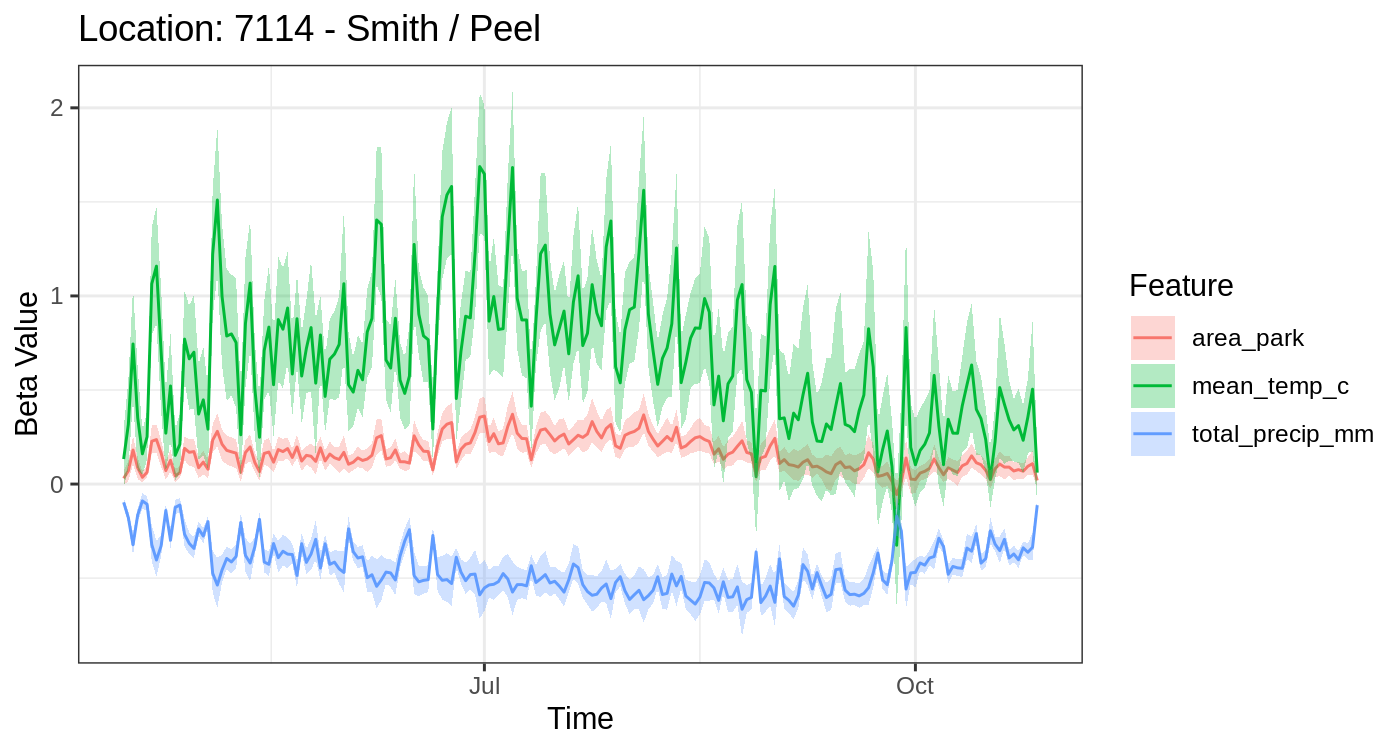

In [34]:
# Plot BIXI betas through time (Figure 6)
plot_temporal_betas(
    bktr_regressor,
    plot_feature_labels = c('mean_temp_c', 'area_park', 'total_precip_mm'),
    spatial_point_label = '7114 - Smith / Peel',
    fig_width = 7, fig_height = 3.75)

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



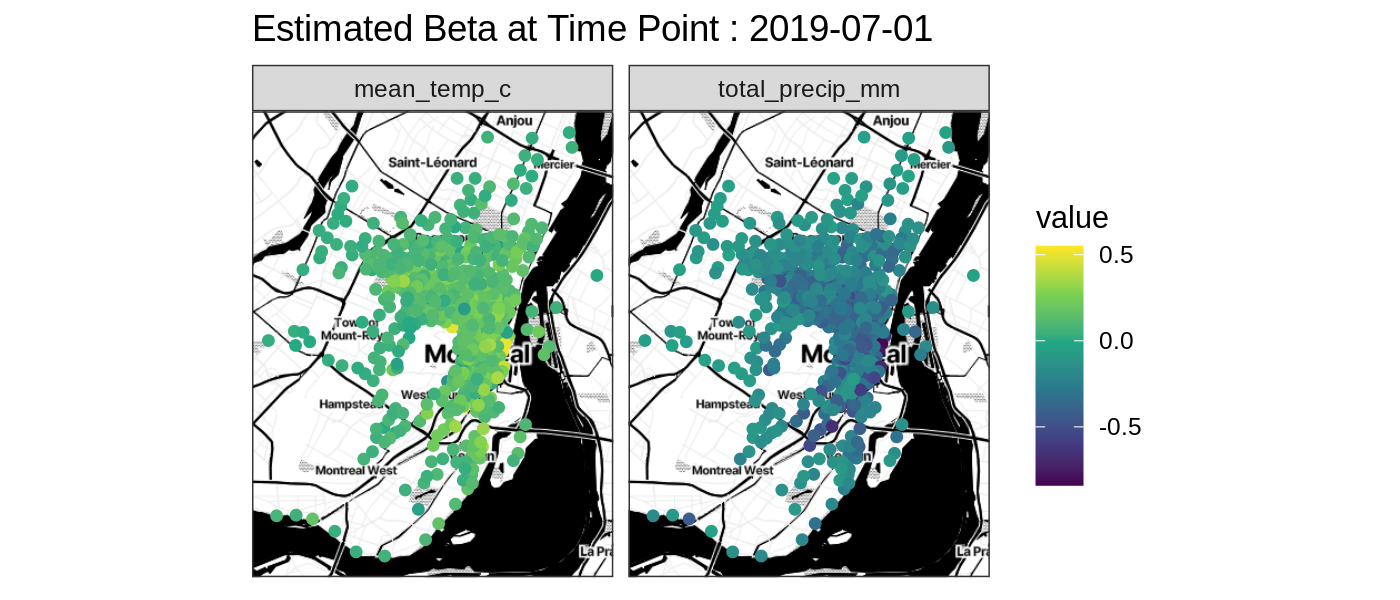

In [35]:

# Plot BIXI betas through space (Figure 7)
plot_spatial_betas(
    bktr_regressor,
    plot_feature_labels = c('mean_temp_c', 'total_precip_mm'),
    temporal_point_label = '2019-07-01',
    nb_cols = 2,
    fig_width = 7, fig_height = 3,
    stadia_token = stadia_api_token)

Warning message in geom_segment(aes(x = min_y, y = min_y, xend = max_y, yend = max_y), :
“All aesthetics have length 1, but the data has 100112 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


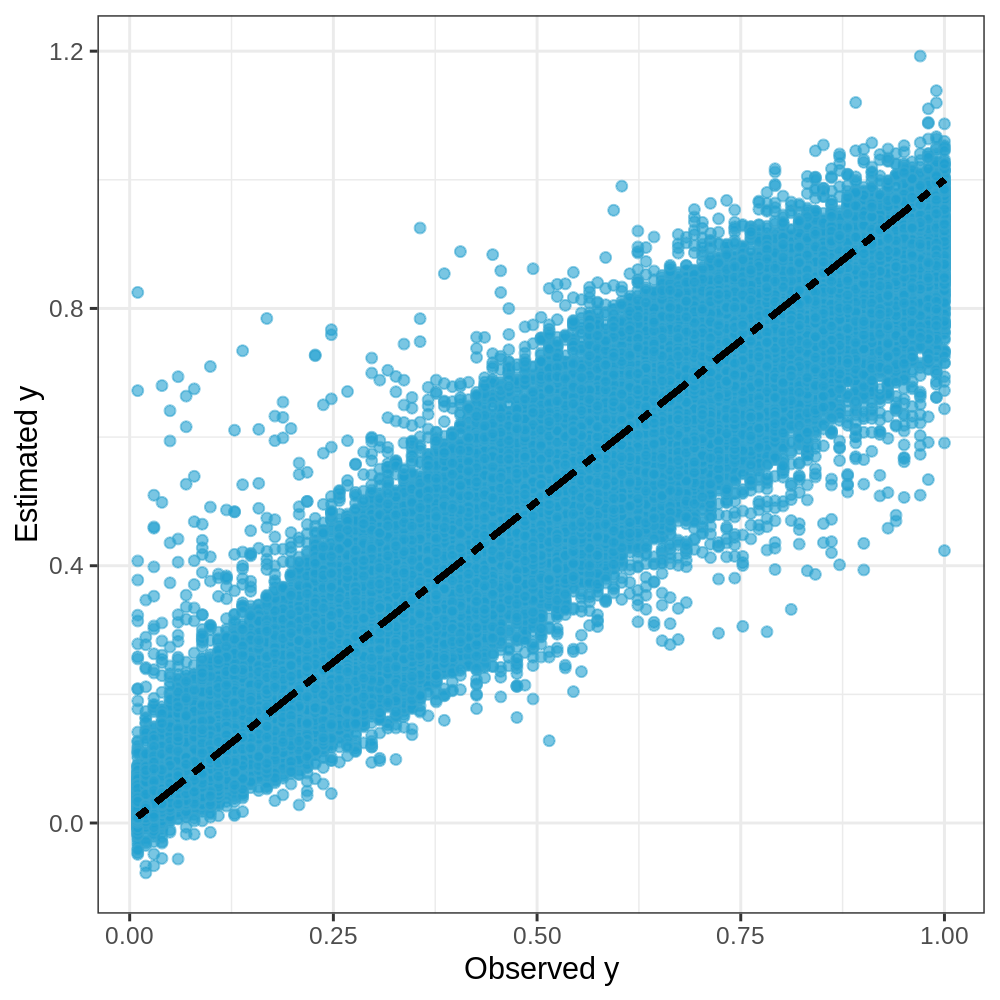

In [36]:
# Plot BIXI y estimates (Figure 8)
plot_y_estimates(bktr_regressor, fig_title = NULL)

## Section 6.2

In [37]:

###############################
### 6.2: Imputation Example ###
###############################

y_is_na <- is.na(bixi_data$data_df$nb_departure)
nb_y_na <- sum(y_is_na)
sprintf(
  'There is %.d missing `nb_departure` values representing ~%.2f%%',
  nb_y_na,
  nb_y_na / length(y_is_na) * 100)

print(bixi_data$data_df[which(y_is_na)[1:3], 1:3])

print(bktr_regressor$imputed_y_estimates[which(y_is_na)[1:3]])

[1] "There is 14940 missing `nb_departure` values representing ~12.99%"

Key: <location, time>
                                         location       time nb_departure
                                           <char>     <IDat>        <num>
1: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-04-22           NA
2: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-08           NA
3: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-16           NA
Key: <location, time>
                                         location       time     y_est
                                           <char>     <IDat>     <num>
1: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-04-22 0.7700214
2: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-08 1.0198550
3: 10002 - Métro Charlevoix (Centre / Charlevoix) 2019-05-16 1.0449483


## Section 6.3

In [38]:

##################################
### 6.3: Interpolation Example ###
##################################

TSR$set_params(seed = 0, fp_type = 'float32', fp_device = 'cuda')
bixi_data <- BixiData$new()
data_df <- bixi_data$data_df
spa_df <- bixi_data$spatial_positions_df
tem_df <- bixi_data$temporal_positions_df

# Separate data in old vs new batches
new_s <- c(
  '4002 - Graham / Wicksteed',
  '7079 - Notre-Dame / Gauvin',
  '6236 - Laurier / de Bordeaux'
)
new_t <- c('2019-05-01', '2019-05-02')
new_t <- as.IDate(new_t)
# Get obs data
obs_s <- setdiff(unlist(spa_df$location), new_s)
obs_t <- as.IDate(setdiff(unlist(tem_df$time), new_t))

obs_data_df <- data_df[data_df[, .I[
  location %in% obs_s & time %in% obs_t]], ]
obs_spa_df <- spa_df[spa_df[, .I[location %in% obs_s]], ]
obs_tem_df <- tem_df[tem_df[,.I[time %in% obs_t]], ]
# Get new data
new_data_df <- data_df[data_df[, .I[
  location %in% new_s | time %in% new_t]], ]
new_spa_df <- spa_df[spa_df[, .I[location %in% new_s]], ]
new_tem_df <- tem_df[tem_df[, .I[time %in% new_t]], ]

bktr_regressor <- BKTRRegressor$new(
  data_df = obs_data_df,
  spatial_positions_df = obs_spa_df,
  temporal_positions_df = obs_tem_df,
  #... other parameters like section 6.1
  formula = nb_departure ~ 1 + mean_temp_c + area_park + total_precip_mm,
  rank = 8,
  spatial_kernel = KernelMatern$new(smoothness_factor = 5),
  temporal_kernel = (
    KernelSE$new() *
      KernelPeriodic$new(
        period_length = KernelParameter$new(value = 7, is_fixed = TRUE)
      )
  ),
  burn_in_iter = 1000,
  sampling_iter = 500)
bktr_regressor$mcmc_sampling()

[1] "Iter 1     | Elapsed Time:     0.23s | MAE:  0.1027 | RMSE:  0.1405"
[1] "Iter 2     | Elapsed Time:     0.14s | MAE:  0.0653 | RMSE:  0.0886"
[1] "Iter 3     | Elapsed Time:     0.25s | MAE:  0.0595 | RMSE:  0.0811"
[1] "Iter 4     | Elapsed Time:     0.29s | MAE:  0.0582 | RMSE:  0.0792"
[1] "Iter 5     | Elapsed Time:     0.23s | MAE:  0.0573 | RMSE:  0.0779"
[1] "Iter 6     | Elapsed Time:     0.25s | MAE:  0.0567 | RMSE:  0.0769"
[1] "Iter 7     | Elapsed Time:     0.54s | MAE:  0.0563 | RMSE:  0.0763"
[1] "Iter 8     | Elapsed Time:     0.22s | MAE:  0.0561 | RMSE:  0.0761"
[1] "Iter 9     | Elapsed Time:     0.52s | MAE:  0.0561 | RMSE:  0.0760"
[1] "Iter 10    | Elapsed Time:     0.68s | MAE:  0.0560 | RMSE:  0.0760"
[1] "Iter 11    | Elapsed Time:     0.47s | MAE:  0.0560 | RMSE:  0.0759"
[1] "Iter 12    | Elapsed Time:     0.42s | MAE:  0.0560 | RMSE:  0.0758"
[1] "Iter 13    | Elapsed Time:     0.43s | MAE:  0.0558 | RMSE:  0.0757"
[1] "Iter 14    | Elapsed Time:     1.

In [39]:
# Prediction on unobserved data
preds <- bktr_regressor$predict(
  new_data_df,
  new_spa_df,
  new_tem_df
)
new_data_df <- data_df[
  data_df[, .I[location %in% new_s | time %in% new_t]],
  c('location', 'time', 'nb_departure')
]
pred_y_df <- preds$new_y_df
# Sort data for comparison and remove na values
setkey(new_data_df, location, time)
setkey(pred_y_df, location, time)
non_na_indices <- which(!is.na(new_data_df$nb_departure))

y_err <- (
    new_data_df$nb_departure[non_na_indices]
    - pred_y_df$y_est[non_na_indices]
)
sprintf('Predicting %d y values || MAE: %.4f || RMSE: %.4f',
        length(non_na_indices), mean(abs(y_err)), sqrt(mean(y_err ^ 2)))

[1] "Predicting 1664 y values || MAE: 0.0882 || RMSE: 0.1279"

Warning message in geom_segment(aes(x = min_y, y = min_y, xend = max_y, yend = max_y), :
“All aesthetics have length 1, but the data has 1664 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


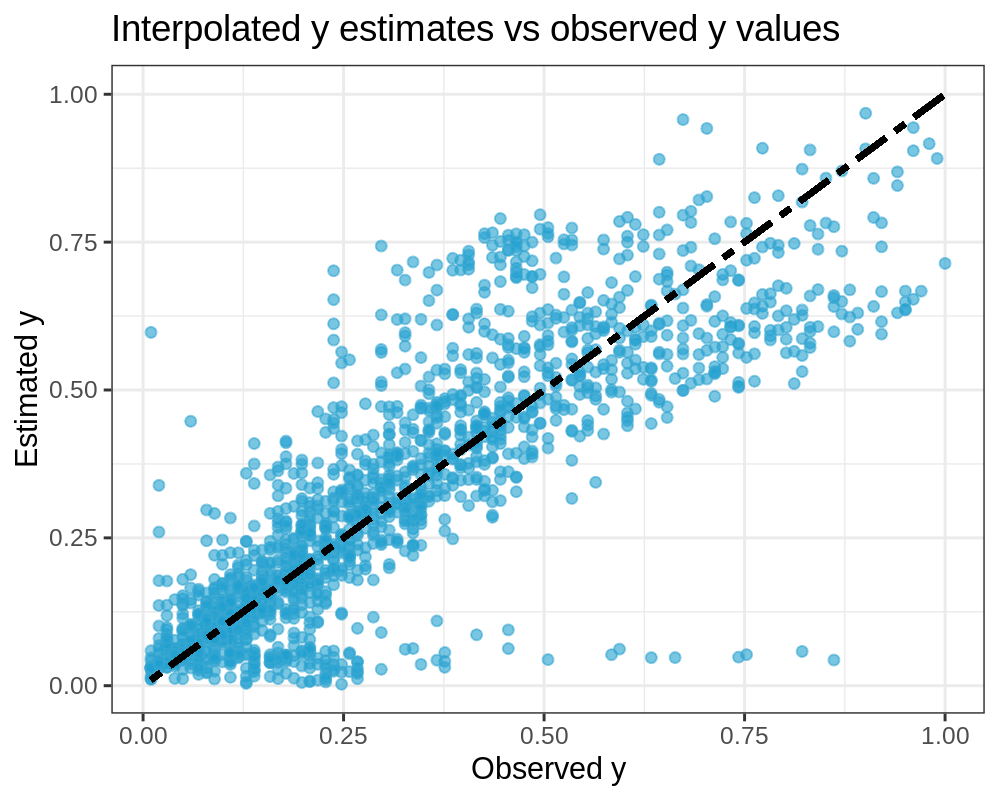

In [45]:
# Options to use a better format for plot output
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)
# Plot y predicted vs y observed (Figure 9)
y_list <- new_data_df$nb_departure[non_na_indices]
y_est_list <- pred_y_df$y_est[non_na_indices]
min_y <- min(y_list)
max_y <- max(y_list)
df <- data.table(y = y_list, y_est = y_est_list)
fig <- (
    ggplot(df, aes(x = .data$y, y = .data$y_est))
    + geom_point(color = '#39a7d0', alpha = 0.6, shape = 21, fill = '#20a0d0')
    + geom_segment(aes(x = min_y, y = min_y, xend = max_y, yend = max_y),
                   color = 'black', linetype = 'twodash', linewidth = 1)
    + theme_bw()
    + ylab('Estimated y')
    + xlab('Observed y')
    + ggtitle('Interpolated y estimates vs observed y values')
)
print(fig)